In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib as plt
import IPython.display as disp
import numpy as np
from sklearn.preprocessing import StandardScaler
# Set the maximum number of rows displayed to 500
pd.set_option('display.max_rows', 500)

# Set the maximum number of columns displayed to 500
pd.set_option('display.max_columns', 500)

# Set the maximum width of each column to 50
pd.set_option('display.max_colwidth', 50)

In [25]:
data = pd.read_csv('../../data/processed/graph_data/graph_data_and_gbc_2.0.csv')
data.head()
data['disease_status'] = data['label'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')

# Binary classification

<Axes: xlabel='disease_status', ylabel='count'>

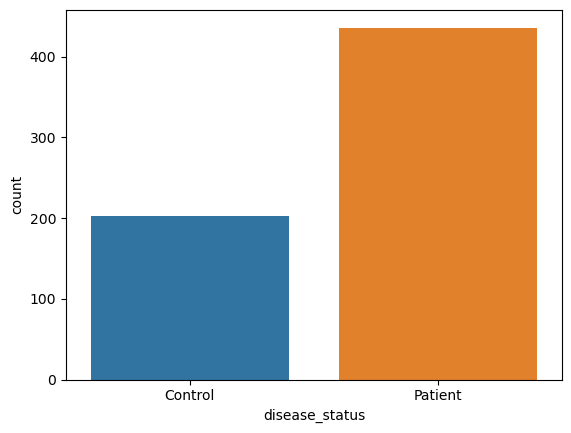

In [3]:
sns.countplot(data, x='disease_status')

In [21]:


X = data.filter(like='X', axis=1)

#X = data.drop(['Group', 'disease_status', 'session_id'], axis=1)
y = data['disease_status'] 

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Hyperparameter tuning

model = MLPClassifier(tol=0.0001, max_iter=1000)


params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

search = RandomizedSearchCV(model, params, n_iter=150, n_jobs=-1).fit(X_train, y_train)

test_ypred = search.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
disp.display(f"Best accuracy achieved in hyper-parameter tuning is: {search.best_score_}")
disp.display(f"Best parameters:\n{search.best_params_}")
disp.display(f"Test score: {acc} +- {acc_CI}")

/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

'Best accuracy achieved in hyper-parameter tuning is: 0.9921568627450981'

"Best parameters:\n{'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': 50, 'alpha': 0.0001, 'activation': 'tanh'}"

'Test score: 0.9921875 +- 0.015252568263182656'

## Multi-label Classification

Text(0, 0.5, 'Group Count')

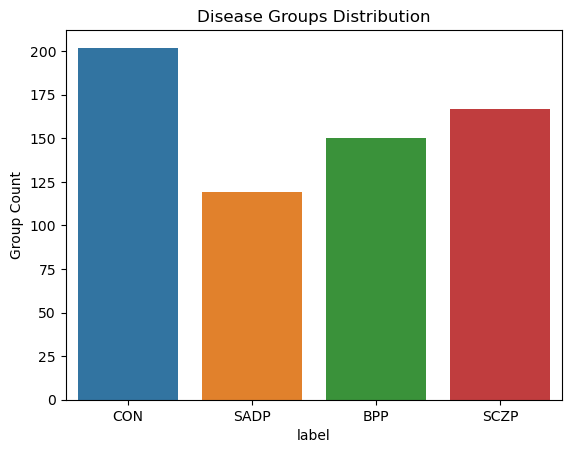

In [26]:
ax = sns.countplot(data, x='label')
ax.set_title('Disease Groups Distribution')
ax.set_ylabel('Group Count')

In [28]:
X = data[data.columns[2:732]].drop(columns=['session_id', 'Number of Nodes', 'Log of Nodes', 'Log Log of Nodes', 'id'])
y = data['label']

display(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

,Number of Edges,Average Degree,Theoretical Avg Clustering,Average Clustering,Theoretical Avg Path Length,Average Path Length,Size of Largest CC,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,...,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718
0,66321,184.738162,0.257654,0.490784,1.260116,1.744172,718,-0.002655,-0.005414,0.000361,-0.002731,-0.005004,-0.005529,-0.005606,0.009788,0.014448,0.006243,0.005986,0.005903,-0.007881,-0.004912,-0.006905,-0.005223,0.003696,0.003681,0.001181,-0.003559,-0.010221,-0.004546,-0.005157,0.008325,0.008033,-0.001994,0.000016,0.000570,-0.001441,-0.004427,-0.006697,-0.011847,-0.009607,-0.012088,-0.012382,0.004702,0.009375,0.004231,0.007153,0.015863,0.017830,0.005675,0.010942,0.001982,0.004565,-0.006959,0.002458,-0.001712,-0.008172,-0.000794,0.014554,0.008908,0.010599,0.007588,0.008797,0.013932,0.006454,-0.000847,0.001824,0.002950,-0.003833,-0.008412,-0.007816,-0.005035,-0.008992,0.000120,-0.009337,-0.010015,-0.007527,-0.006822,-0.005631,-0.010157,0.001644,-0.000283,0.003469,-0.000676,-0.008928,0.012510,0.003251,0.005943,-0.001074,0.003492,-0.005851,-0.005621,-0.010774,-0.005870,-0.011422,-0.002516,-0.010459,-0.001721,-0.001328,0.005360,0.000845,0.000868,0.002463,-0.000651,-0.008640,-0.011154,0.007795,0.009583,0.013680,0.014259,0.004842,0.004371,0.011856,0.009860,0.004008,0.006135,0.004899,0.003755,0.003118,-0.001759,0.015519,0.012137,0.009375,0.009250,0.003460,-0.000129,-0.000546,0.003447,0.000452,0.003285,0.004123,0.005644,0.002987,-0.000200,-0.001039,0.001202,0.005174,0.001214,0.001699,-0.000523,-0.008081,-0.002815,-0.000208,0.004954,-0.004526,0.004307,0.001445,-0.000086,-0.002529,-0.003991,-0.004130,-0.000711,0.000425,-0.000464,0.007600,0.011438,-0.000478,-0.007593,-0.012201,-0.

In [29]:
model = MLPClassifier(tol=0.0001, max_iter=1000)

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

searcher = RandomizedSearchCV(model, params, n_iter=100, cv=5, random_state=42, n_jobs=4, verbose=1)

searcher.fit(X_train, y_train)

disp.display(f"Best accuracy achieved during hyper-parameter tuning is: {searcher.best_score_}")
disp.display(f"Best parameters are: {searcher.best_params_}")

test_ypred = searcher.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
print(f"Test accuracy: {acc} +- {acc_CI}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

'Best accuracy achieved during hyper-parameter tuning is: 0.6215686274509803'

"Best parameters are: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 50, 'alpha': 0.0001, 'activation': 'relu'}"

Test accuracy: 0.2265625 +- 0.07251998625884054


/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
